In [ ]:
!pip install xgboost
# Importing packages and settings: 
import warnings 
warnings.filterwarnings(action= 'ignore')
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot  as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold,TimeSeriesSplit,RepeatedKFold
from xgboost import XGBRFClassifier
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('AMZN.csv') 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [ ]:
df.sort_values(by="Date", inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6420,2022-11-16,96.849998,98.489998,95.540001,97.120003,97.120003,87958800
6421,2022-11-17,95.370003,96.970001,94.029999,94.849998,94.849998,82617900
6422,2022-11-18,95.949997,95.989998,92.480003,94.139999,94.139999,72336500
6423,2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300


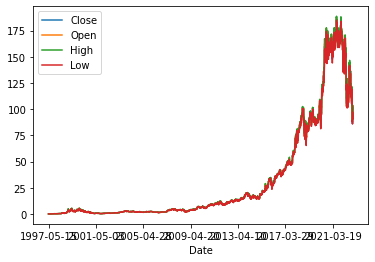

In [ ]:
_ = df.plot(x="Date", y=["Close", "Open", "High", "Low"])

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6420,2022-11-16,96.849998,98.489998,95.540001,97.120003,97.120003,87958800
6421,2022-11-17,95.370003,96.970001,94.029999,94.849998,94.849998,82617900
6422,2022-11-18,95.949997,95.989998,92.480003,94.139999,94.139999,72336500
6423,2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300


In [ ]:
df["Moving_Average_100"] = (df["Close"] - df["Open"]).rolling(window=100, min_periods=1).mean()
df["Moving_Average_365"] = (df["Close"] - df["Open"]).rolling(window=365, min_periods=1).mean()
df['100dayEWM'] = (df["Close"] - df["Open"]).ewm(span=100, adjust=False).mean()
df['365dayEWM'] = (df["Close"] - df["Open"]).ewm(span=365, adjust=False).mean()
#k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
#d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
#df['macd'] = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
#df['macd_s'] = df['macd'].ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
#macd_h = df['macd'] - df['macd_s']
# df["Moving_Average_3"] = (df["Close"] - df["Open"]).rolling(window=3, min_periods=1).mean()
# df["Moving_Average_7"] = (df["Close"] - df["Open"]).rolling(window=7, min_periods=1).mean()
#df['4dayEWM'] = (df["Close"] - df["Open"]).ewm(span=4, adjust=False).mean()
#df['7dayEWM'] = (df["Close"] - df["Open"]).ewm(span=7, adjust=False).mean()
#k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
#d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
#df['macd'] = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
#df['macd_s'] = df['macd'].ewm(span=9, adjust=False, min_periods=9).mean()
 #Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
#macd_h = df['macd'] - df['macd_s']
weekly_mean = df.rolling(7).mean()["Close"]
quarterly_mean = df.rolling(90).mean()["Close"]
annual_mean = df.rolling(365).mean()["Close"]


df["weekly_mean"] = weekly_mean / df["Close"]
df["quarterly_mean"] = quarterly_mean / df["Close"]
df["annual_mean"] = annual_mean / df["Close"]
df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]


In [ ]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Average_100,Moving_Average_365,100dayEWM,365dayEWM,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,day,month,year
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,-0.023958,-0.023958,-0.023958,-0.023958,NaN,NaN,NaN,NaN,NaN,5,1997,15
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,-0.017969,-0.017969,-0.023721,-0.023893,NaN,NaN,NaN,NaN,NaN,5,1997,16
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,-0.012847,-0.012847,-0.023303,-0.023776,NaN,NaN,NaN,NaN,NaN,5,1997,19
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,-0.010807,-0.010807,-0.022934,-0.023672,NaN,NaN,NaN,NaN,NaN,5,1997,20
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,-0.010729,-0.010729,-0.022686,-0.023599,NaN,NaN,NaN,NaN,NaN,5,1997,21


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Average_100,Moving_Average_365,100dayEWM,365dayEWM,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,day,month,year,is_quarter_end
6420,2022-11-16,96.849998,98.489998,95.540001,97.120003,97.120003,87958800,-0.0814,-0.108412,-0.262066,-0.153536,0.982716,1.239086,1.514609,1.541247,1.222360,11,2022,16,1
6421,2022-11-17,95.370003,96.970001,94.029999,94.849998,94.849998,82617900,-0.0256,-0.110971,-0.267173,-0.155539,1.013570,1.266919,1.548858,1.528121,1.222540,11,2022,17,1
6422,2022-11-18,95.949997,95.989998,92.480003,94.139999,94.139999,72336500,-0.0591,-0.125196,-0.297724,-0.164579,1.033355,1.274527,1.558405,1.508103,1.222732,11,2022,18,1
6423,2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300,-0.0552,-0.128946,-0.321730,-0.171931,1.045688,1.295151,1.584503,1.515273,1.223412,11,2022,21,1
6424,2022-11-22,92.620003,93.349998,90.870003,93.199997,93.199997,62192000,-0.0821,-0.132431,-0.303874,-0.167823,1.025751,1.282417,1.569688,1.530282,1.224008,11,2022,22,1


In [ ]:

df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,Moving_Average_100,Moving_Average_365,100dayEWM,365dayEWM,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,day,month,year
is_quarter_end,,,,,,,,,,,,,,,,,,
0,30.890751,31.247344,30.499101,30.87804,30.87804,1.372084e+08,-0.007584,-0.003470,-0.008401,-0.005575,0.998931,0.969268,0.889303,0.888238,0.903665,6.628074,2009.50179,15.750060
1,30.401874,30.781662,29.976954,30.38510,30.38510,1.555123e+08,-0.018562,-0.019526,-0.018652,-0.018434,0.997870,0.994517,1.120996,1.117522,1.052575,6.487030,2009.87254,15.710197


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [ ]:
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [ ]:
df["Today_Direction"] = df["Close"] - df["Open"]
df["Price_Range"] = df["High"] - df["Low"]

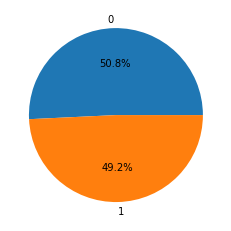

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:

features = df[['open-close', 'low-high', 'is_quarter_end','Volume']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(5782, 4) (643, 4)


In [ ]:
df


,Open,High,Low,Close,Adj Close,Volume,Moving_Average_100,Moving_Average_365,100dayEWM,365dayEWM,...,annual_quarterly_mean,day,month,year,is_quarter_end,open-close,low-high,target,Today_Direction,Price_Range
0,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,-0.023958,-0.023958,-0.023958,-0.023958,...,NaN,5,1997,15,0,0.023958,-0.028646,0,-0.023958,0.028646
1,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,-0.017969,-0.017969,-0.023721,-0.023893,...,NaN,5,1997,16,0,0.011980,-0.013541,0,-0.011980,0.013541
2,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,-0.012847,-0.012847,-0.023303,-0.023776,...,NaN,5,1997,19,0,0.002604,-0.007292,0,-0.002604,0.007292
3,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,-0.010807,-0.010807,-0.022934,-0.023672,...,NaN,5,1997,20,0,0.004687,-0.005729,0,-0.004687,0.005729
4,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,-0.010729,-0.010729,-0.022686,-0.023599,...,NaN,5,1997,21,0,0.010417,-0.013542,0,-0.010417,0.013542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,96.849998,98.489998,95.540001,97.120003,97.120003,87958800,-0.081400,-0.108412,-0.262066,-0.153536,...,1.222360,11,2022,16,1,-0.270005,-2.949997,0,0.270005,2.949997
6421,95.370003,96.970001,94.029999,94.849998,94.849998,82617900,-0.025600,-0.110971,-0.267173,-0.155539,...,1.222540,11,2022,17,1,0.520005,-2.940002,0,-0.520005,2.940002
6422,95.949997,95.989998,92.480003,94.139999,94.139999,72336500,-0.059100,-0.125196,-0.297724,-0.164579,...,1.222732,11,2022,18,1,1.809998,-3.509995,0,-1.809998,3.509995
6423,93.970001,95.019997,90.589996,92.459999,92.459999,84330300,-0.055200,-0.128946,-0.321730,-0.171931,...,1.223412,11,2022,21,1,1.510002,-4.430001,1,-1.510002,4.430001


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LogisticRegression() : 
Training ROC :  0.5136037468120659
Validation ROC :  0.5319008904374758
Training Accuracy :  0.5093393289519198
Validation Accuracy :  0.5063201703445606
SVC(probability=True) : 
Training ROC :  0.5437082798146556
Validation ROC :  0.5223964382500967
Training Accuracy :  0.5375302663438256
Validation Accuracy :  0.5290021293070073
BernoulliNB() : 
Training ROC :  0.5186364073169392
Validation ROC :  0.5692895857530004
Training Accuracy :  0.5172950536146662
Validation Accuracy :  0.5637969415408439
RandomForestClassifier(n_estimators=2000) : 
Training ROC :  1.0
Validation ROC :  0.46195799457994585
Training Accuracy :  1.0
Validation Accuracy :  0.4752710027100271
XGBRFClassifier() : 
Training ROC :  0.5844267139868913
Validation ROC :  0.5436653116531166
Training Accuracy :  0.5541335178139052
Validation Accuracy :  0.533778552071235
LGBMClassifier() : 
Training ROC :  0.8471733342173166
Validation ROC :  0.4661730545876887
Training Accuracy :  0.7632307160152

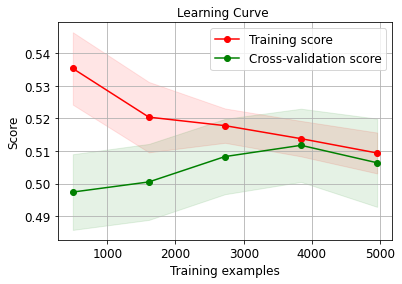

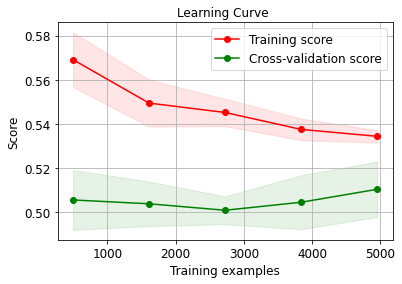

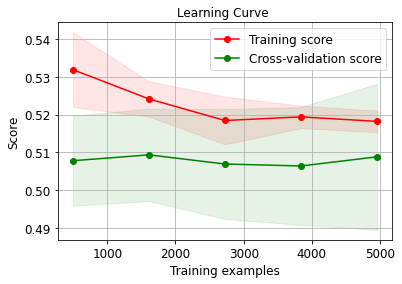

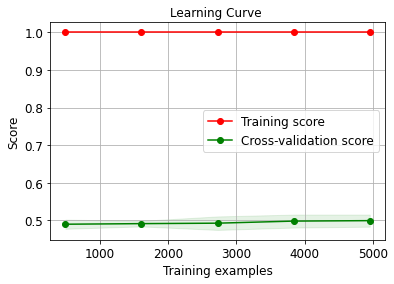

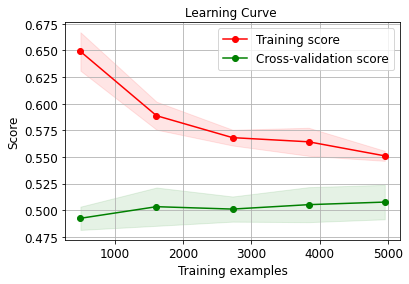

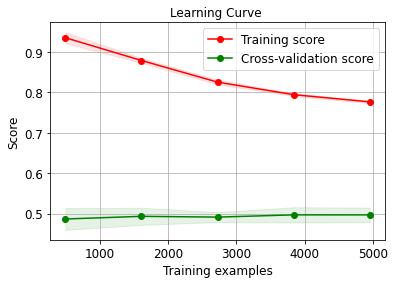

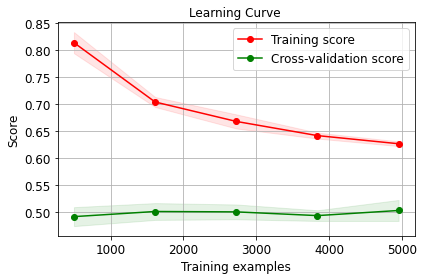

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as gbm
import matplotlib.pyplot as plt
import scikitplot as skplt

models = [LogisticRegression(), SVC(probability=True),BernoulliNB(), RandomForestClassifier(n_estimators=2000),XGBRFClassifier(),gbm.LGBMClassifier(),xgb.XGBClassifier(),GradientBoostingClassifier()]
 
for i in range(7):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
    print('Training ROC : ', metrics.roc_auc_score(
      Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation ROC : ', metrics.roc_auc_score(
      Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print('Training Accuracy : ', metrics.accuracy_score(
      Y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
      Y_valid, models[i].predict(X_valid)))
    skplt.estimators.plot_learning_curve(models[i], X_train, Y_train,
                                     cv=7, shuffle=True, scoring="accuracy", n_jobs=-1,
                                     figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Learning Curve ")
plt.tight_layout()  
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
lr = LogisticRegression(penalty='l2')
level0 = list()
level0.append(('bayes', BernoulliNB()))
level0.append(('xgbf',XGBRFClassifier(n_estimators=5000,max_depth=12,learning_rate=0.001,gamma=3.9,colsample_bynode=0.2,colsample_bytree=0.54,reg_alpha=41,reg_lambda=0.89,min_child_weight=1)))
level0.append(('lrf',LogisticRegression()))

clf= StackingClassifier(estimators =level0, final_estimator = lr,cv=10,n_jobs=-1)



In [ ]:
clf.fit(X_train,Y_train)

StackingClassifier(cv=10,
                   estimators=[('bayes', BernoulliNB()),
                               ('xgbf',
                                XGBRFClassifier(colsample_bynode=0.2,
                                                colsample_bytree=0.54,
                                                gamma=3.9, learning_rate=0.001,
                                                max_depth=12, n_estimators=5000,
                                                reg_alpha=41,
                                                reg_lambda=0.89)),
                               ('lrf', LogisticRegression())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [ ]:
 # evaluating accuracy
print('Training ROC : ', metrics.roc_auc_score(
      Y_train, clf.predict_proba(X_train)[:,1]))
print('Validation ROC : ', metrics.roc_auc_score(
      Y_valid, clf.predict_proba(X_valid)[:,1]))


Training ROC :  0.5186588459687675
Validation ROC :  0.5701025938830817


In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, Y_train), ( X_valid, Y_valid)]
    
    clf.fit(X_train, Y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_valid)
    accuracy = accuracy_score(Y_valid, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.5101088646967341
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SCORE:
0.48989113530326595
SC

In [ ]:
best_hyperparams

In [ ]:
! pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None)
models,prediction = clf.fit(X_train,X_valid,Y_train,Y_valid)
print(models)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define model
lr = LogisticRegression()
steps = [('lr', lr)]
pipeline = Pipeline(steps)
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2','elasticnet','none']
solver = ['liblinear','ibfgs','newton-cg','sag','saga']
# define evaluation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
parameters = {'lr__penalty' : penalty,
             'lr__C' : C,
              'lr__solver':solver}
    

# define search
clf_GS = RandomizedSearchCV(pipeline, parameters,n_iter=1000,n_jobs=-1)
result = clf_GS.fit(X, y)
# execute search



print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(clf_GS.best_estimator_.get_params()['lr'])

clf_GS = GridSearchCV(pipeline, parameters,n_jobs=-1)
result = clf_GS.fit(X, y)


print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(clf_GS.best_estimator_.get_params()['lr'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
# pre-processing data
scaler = StandardScaler()
# define classifier
knn = KNeighborsClassifier( )
# define pipeline
steps = [('knn', knn)]
pipeline = Pipeline(steps)
n_neighbors = np.arange(1,50)
weights = ['uniform','distance']
algorithm = ['auto','kd_tree','ball_tree','brute']
# define parameters
parameters = {'knn__n_neighbors': np.arange(1, 50),
              'knn__weights': weights,
              'knn__algorithm':algorithm}
# splitting data
# combine gridsearch with pipeline 
pipeline_cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
# fit to data
result_knn = pipeline_cv.fit(X_train, y_train)


# fit to data


print('Best Score: %s' % result_knn.best_score_)
print('Best Hyperparameters: %s' % result_knn.best_params_)
print(pipeline_cv.best_estimator_.get_params()['knn'])

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
dt = DecisionTreeClassifier()
steps = [('dt',dt)]
pipeline_dt = Pipeline(steps)
criterion = ['gini','entropy','log_loss']
splitter = ['best','random']
max_depth = np.arange(2,10)
min_samples_split = np.arange(2,5)
min_samples_leaf = np.arange(1,5)

parameters ={  'dt__criterion': criterion,
               'dt__splitter' : splitter,
               'dt__max_depth': max_depth,
               'dt__min_samples_split': min_samples_split,
               'dt__min_samples_leaf': min_samples_leaf }
pipeline_cv_dt = GridSearchCV(pipeline_dt,param_grid=parameters,cv=5,verbose=2,n_jobs=-1)
result_dt =pipeline_cv_dt.fit(X_train,Y_train)
print('Best Score: %s' % result_dt.best_score_)
print('Best Hyperparameters: %s' % result_dt.best_params_)
print(pipeline_cv_dt.best_estimator_.get_params()['dt'])
pipeline_cv_dt = RandomizedSearchCV(pipeline_dt,parameters,cv=5,verbose=2,n_jobs=-1,n_iter=100)
result_dt =pipeline_cv_dt.fit(X_train,Y_train)
print('Best Score: %s' % result_dt.best_score_)
print('Best Hyperparameters: %s' % result_dt.best_params_)
print(pipeline_cv_dt.best_estimator_.get_params()['dt'])


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Score: 0.5183359601403223
Best Hyperparameters: {'dt__criterion': 'entropy', 'dt__max_depth': 8, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 3, 'dt__splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=3, splitter='random')
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score: 0.512974283210666
Best Hyperparameters: {'dt__splitter': 'random', 'dt__min_samples_split': 3, 'dt__min_samples_leaf': 3, 'dt__max_depth': 7, 'dt__criterion': 'gini'}
DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3,
                       splitter='random')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
steps = [('rf',rf)]
pipeline_rf = Pipeline(steps)

criterion = ['gini','entropy','log_loss']
max_depth = np.arange(2,20)
min_samples_split = np.arange(2,5)
min_samples_leaf = np.arange(1,5)
n_estimators = np.arange(50,5000,50)
class_weight = ['balanced','balanced_subsample']
parameters = {
    'rf__criterion':criterion,
    'rf__max_depth':max_depth,
    'rf__min_samples_split':min_samples_split,
    'rf__min_samples_leaf' : min_samples_leaf,
    'rf__n_estimators' : n_estimators,
    'rf__class_weight': class_weight }

pipeline_rf_cv_rm = RandomizedSearchCV(pipeline_rf,parameters,n_iter=100,verbose=2,cv=5,n_jobs=-1)
results_rf_random = pipeline_rf_cv_rm.fit(X_train,Y_train)
print('Best Score RS %s'% results_rf_random.best_score_)
print('Best Parameters %s' %results_rf_random.best_params_)

print(pipeline_rf_cv_rm.best_estimator_.get_params()['rf'])


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score RS 0.5108965137735403
Best Parameters {'rf__n_estimators': 2450, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 4, 'rf__max_depth': 2, 'rf__criterion': 'entropy', 'rf__class_weight': 'balanced_subsample'}
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=2, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=2450)


In [ ]:
print(pipeline_rf_cv_rm.best_estimator_.get_params()['rf'])

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=2, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=2450)


In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
steps = [('xgb',xgb)]
pipeline_xgb = Pipeline(steps)

n_esitmators = np.arange(1,50)
max_depth = np.arange(1,20)
learning_rate = np.arange(.01,10,.01)
objective = ['reg:logistic', 'binary:hinge']
subsample = np.arange(0.1,1.0,0.1)
booster = ['gbtree','gblinear','dart']

parameters = { 'xgb__n_estimators': n_esitmators,
               'xgb__max_depth' : max_depth,
               'xgb__leanring_rate':learning_rate,
               'xgb__objective': objective,
               'xgb__subsample':subsample,
               'xgb__booster': booster}
pipeline_xgb = RandomizedSearchCV(pipeline_xgb,parameters,cv=5,n_jobs=-1,n_iter=1000)  
results_xbg_random = pipeline_xgb.fit(X_train,Y_train)
print('Best Score %s'% results_xbg_random.best_score_)
print('Best HyperParameters %s' %results_xbg_random.best_params_)
print(pipeline_xgb.best_estimator_.get_params()['xgb'])

Best Score 0.5155655510462867
Best HyperParameters {'xgb__subsample': 0.2, 'xgb__objective': 'reg:logistic', 'xgb__n_estimators': 32, 'xgb__max_depth': 4, 'xgb__leanring_rate': 9.45, 'xgb__booster': 'dart'}
XGBClassifier(booster='dart', leanring_rate=9.45, max_depth=4, n_estimators=32,
              objective='reg:logistic', subsample=0.2)


In [ ]:
from scipy.stats import bootstrap
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
steps = [('ada',ada)]
pipeline_ada = Pipeline(steps)
n_estimators = np.arange(1,500)
learning_rate = np.arange(.01,10,.01)
algorithm = ['SAMME','SAMME.R']

parameters = {   'ada__algorithm' : algorithm,
                 'ada__learning_rate' : learning_rate,
                'ada__n_estimators' : n_estimators,
               'ada__algorithm' : algorithm }
pipeline_ada_random = RandomizedSearchCV(pipeline_ada,parameters,cv =3,n_iter=100,n_jobs=-1)
pipeline_ada_random.fit(X_train,Y_train)
print('Best Score %s'%pipeline_ada_random.best_score_)
print('Best HyperParamters %s'%pipeline_ada_random.best_params_)
print(pipeline_ada_random.best_estimator_.get_params()['ada'])

In [ ]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X_train, Y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
		level0 = list()
		level0.append(('lr', clf_GS.best_estimator_.get_params()['lr']))
		level0.append(('knn', pipeline_cv.best_estimator_.get_params()['knn']))
		level0.append(('dt', pipeline_cv_dt.best_estimator_.get_params()['dt']))
		level0.append(('svm', SVC()))
		level0.append(('bayes', GaussianNB()))
		level0.append(('rf',pipeline_rf_cv_rm.best_estimator_.get_params()['rf']))
		level0.append(('xgb',pipeline_xgb.best_estimator_.get_params()['xgb']))
		level0.append(('ada',pipeline_ada_random.best_estimator_.get_params()['ada']))
		# define meta learner model
		level1 = LogisticRegression()
		# define the stacking ensemble
		model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
		return model
 
# get a list of models to evaluate
def get_models():
		models = dict()
		models['lr']= clf_GS.best_estimator_.get_params()['lr']
		models['knn']= pipeline_cv.best_estimator_.get_params()['knn']
		models['dt']= pipeline_cv_dt.best_estimator_.get_params()['dt']
		models['svm'] = SVC()
		models['bayes']= GaussianNB()
		models['rf'] = pipeline_rf_cv_rm.best_estimator_.get_params()['rf']
		models['xgb']= pipeline_xgb.best_estimator_.get_params()['xgb']
		models['ada'] = pipeline_ada_random.best_estimator_.get_params()['ada']
		models['stacking'] = get_stacking()
		return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = TimeSeriesSplit(n_splits=10)
	scores = cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_test, Y_test)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:

from xgboost.sklearn import XGBClassifier

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold,RepeatedKFold
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=25, n_informative=20, n_redundant=5, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
      level0 = list()
      level0.append(('lr', LogisticRegression()))
      level0.append(('knn', KNeighborsClassifier()))
      level0.append(('dt', DecisionTreeClassifier()))
      level0.append(('svm', SVC()))
      level0.append(('bayes', GaussianNB()))
      level0.append(('rf',RandomForestClassifier()))
      level0.append(('xgb',XGBClassifier()))
      level0.append(('xgbf',XGBRFClassifier()))
      level0.append(('ada',AdaBoostClassifier()))
      # define meta learner model
      level1 = LogisticRegression()
      # define the stacking ensemble
      model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
      return model
 
# get a list of models to evaluate
def get_models():
      models = dict()
      models['lr']= LogisticRegression()
      models['knn']= KNeighborsClassifier()
      models['dt']= DecisionTreeClassifier()
      models['svm'] = SVC()
      models['bayes']= GaussianNB()
      models['rf'] = RandomForestClassifier()
      models['xgb']= XGBClassifier()
      models['xgbf']=XGBRFClassifier()
      models['ada'] = AdaBoostClassifier()
      models['stacking'] = get_stacking()
      return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5)
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    print(scores)
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores_val = evaluate_model(model, X_test, y_test)
	results.append(scores_val)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
X

In [ ]:
evaluate_model(model, X_test, y_test)

In [ ]:
!pip install yfinance

In [ ]:

import yfinance as yf

amzn = yf.Ticker("AMZN")
amzn_hist = amzn.history(period="max")

In [ ]:
import os
import pandas as pd

DATA_PATH = "amzn_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    amzn = yf.Ticker("AMZN")
    amzn_hist = amzn.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    amzn_hist.to_json(DATA_PATH)

In [ ]:
amzn_hist.head(5)

In [ ]:
amzn_hist.plot.line(y="Close", use_index=True)

In [ ]:
# Ensure we know the actual closing price
data = amzn_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = amzn_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
amzn_prev = amzn_hist.copy()
amzn_prev = amzn_prev.shift(1)

In [ ]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(amzn_prev[predictors]).iloc[1:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [ ]:
# Create a train and test set
train = data.iloc[:-100]
test = data.iloc[-100:]

rfc.fit(train[predictors], train["Target"])

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [ ]:
i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
rfc.fit(train[predictors], train["Target"])
preds = rfc.predict(test[predictors])

In [ ]:
preds = rfc.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0

In [ ]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    rfc.fit(train[predictors], train["Target"])

    # Make predictions
    preds = rfc.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

In [ ]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        rfc.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [ ]:
predictions = backtest(data, rfc, predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


In [ ]:
! pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None)
models,prediction = clf.fit(X_train,X_test,y_train,y_test)
print(models)

In [ ]:
# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from xgboost import XGBRFClassifier
# define dataset
X_train, y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5)
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=20,learning_rate=0.0001)
# define the model evaluation procedure
cv = KFold(n_splits=5)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
y_test

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X_train, y_train = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=7)
	return X_train, y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define the number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for v in n_trees:
		models[str(v)] = XGBRFClassifier(n_estimators=v, subsample=0.9, colsample_bynode=0.2,)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X_train, y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X_test, y_test)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
xgbrf = XGBRFClassifier(n_estimators=500, subsample=0.9, colsample_bynode=0.2)
scores= evaluate_model(xgbrf, X_test, y_test)
scores

In [ ]:
xgbrf.fit(X_train,y_train)
pred= xgbrf.predict(X_test)
accuracy_score(y_test,pred)

In [ ]:

# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)

In [ ]:

from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X, y)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# gradient xgboost random forest for making predictions for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRFRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of data
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
# make a prediction
yhat = model.predict(row)
# summarize the prediction
print('Prediction: %d' % yhat[0])

In [ ]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, stratify=y, random_state=1121218 
)
# Creating an object with the column labels of only the categorical features and one with only the numeric features:
categorical_features = X.select_dtypes(exclude="number").columns.tolist()
numeric_features = X.select_dtypes(include="number").columns.tolist()
# Create the categorical pipeline, for the categorical variables Aki imputes the missing values with a constant value and we encode them with One-Hot encoding:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy= 'constant', fill_value= 'unknown')), 
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False)) 
    ]
)
# Create the numeric pipeline, for the numeric variables Aki imputes the missings with the mean of the column and standardize them, so that the features have a mean of 0 and a variance of 1: 
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)
# Combining the two pipelines with a column transformer:
full_processor = ColumnTransformer(transformers=[
        ("numeric", numeric_pipeline, numeric_features),
        ("categorical", categorical_pipeline, categorical_features),
    ]
)

In [ ]:
X_test

In [ ]:
# Instantiate the XGBClassifier:
xgb_cl = xgb.XGBClassifier(eval_metric='logloss', seed=7) 
# Create XGBoost pipeline:
xgb_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', xgb_cl)
])
# Evaluate the model with the use of cv:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)  #, shuffle=True with or without shuffle??
scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=cv, scoring = 'roc_auc')
print("roc_auc = %f (%f)" % (scores.mean(), scores.std()))

In [ ]:
def print_results_gridsearch(gridsearch, list_param1, list_param2, name_param1, name_param2):
  
  # Checking the results from each run in the gridsearch: 
  means = gridsearch.cv_results_['mean_test_score']
  stds = gridsearch.cv_results_['std_test_score']
  params = gridsearch.cv_results_['params']
  print("The results from each run in the gridsearch:")
  for mean, stdev, param in zip(means, stds, params):
    print("roc_auc = %f (%f) with: %r" % (mean, stdev, param))
  
  #Visualizing the results from each run in the gridsearch: 
  scores = np.array(means).reshape(len(list_param1), len(list_param2))
  for i, value in enumerate(list_param1):
    plt.plot(list_param2, scores[i], label= str(name_param1) + ': ' + str(value))
  plt.legend()
  plt.xlabel(str(name_param2))
  plt.ylabel('ROC AUC')  
  plt.show()
    
  # Checking the best performing model:
  print("\n")
  print("Best model: roc_auc = %f using %s" % (gridsearch.best_score_, gridsearch.best_params_))

In [ ]:
# Step 1: Searching for the optimum parameters for the learning rate and the number of estimators:
# Defining the parameter grid to be used in GridSearch:
param_grid = {"model__subsample": [0.8], "model__colsample_bytree": [0.8]
              , "model__learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
              , "model__n_estimators": range(50,500,50)
              }
#instantiate the Grid Search:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7) 
grid_cv1 = GridSearchCV(xgb_pipeline
                        , param_grid
                        , n_jobs= -1 
                        , cv = cv
                        , scoring="roc_auc") 
# Fit
_ = grid_cv1.fit(X_train, y_train) 
# Checking the results from each run in the gridsearch:  
print_results_gridsearch(gridsearch=grid_cv1, list_param1 = param_grid["model__learning_rate"], list_param2 = param_grid["model__n_estimators"]
                         , name_param1 = 'learning_rate' , name_param2 = 'n_estimators')

In [ ]:
# Step 2: Searching for the optimum parameters for max_depth and min_child_weight:
# Defining the parameter grid to be used in GridSearch:
param_grid = {"model__subsample": [0.8], "model__colsample_bytree": [0.8], "model__learning_rate": [0.0001], "model__n_estimators": [100]
              , 'model__max_depth': range(3,10,2)
              , 'model__min_child_weight': range(1,6,2)
             }
#instantiate the Grid Search:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_cv2 = GridSearchCV(xgb_pipeline
                        , param_grid
                        , n_jobs=-1
                        , cv=cv
                        , scoring="roc_auc") 
# Fit
_ = grid_cv2.fit(X_train, y_train) 
# Checking the results from each run in the gridsearch:  
print_results_gridsearch(gridsearch=grid_cv2, list_param1 = param_grid["model__max_depth"], list_param2 = param_grid["model__min_child_weight"]
                         , name_param1 = 'max_depth' , name_param2 = 'min_child_weight')


In [ ]:
# Step 3: Searching for the optimum parameters for subsample and colsample_bytree:
# Defining the parameter grid to be used in GridSearch:
param_grid = {"model__learning_rate": [0.0001], "model__n_estimators": [100], 'model__max_depth': [3], 'model__min_child_weight': [3]
              , 'model__subsample':[i/10.0 for i in range(4,10)]
              , 'model__colsample_bytree':[i/10.0 for i in range(4,10)] 
             }
#instantiate the Grid Search:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_cv3 = GridSearchCV(xgb_pipeline
                        , param_grid
                        , n_jobs=-1
                        , cv=cv
                        , scoring="roc_auc") 
# Fit
_ = grid_cv3.fit(X_train, y_train) 
# Checking the results from each run in the gridsearch:  
print_results_gridsearch(gridsearch=grid_cv3, list_param1 = param_grid["model__subsample"], list_param2 = param_grid["model__colsample_bytree"]
                         , name_param1 = 'subsample' , name_param2 = 'colsample_bytree')

In [ ]:
# Step 4: Searching for the optimum parameters for gamma and lambda: 
# Defining the parameter grid to be used in GridSearch:
param_grid = {"model__learning_rate": [0.0001], "model__n_estimators": [100], 'model__max_depth': [3], 'model__min_child_weight': [3], 'model__subsample':[0.4], 'model__colsample_bytree':[0.9] 
              , "model__gamma": [i/10.0 for i in range(0,6)]
              , "model__reg_lambda": [0, 0.5, 1, 1.5, 2, 3, 4.5]
             }
              
#instantiate the Grid Search:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_cv4 = GridSearchCV(xgb_pipeline
                        , param_grid
                        , n_jobs=-1
                        , cv=cv
                        , scoring="roc_auc") 
# Fit
_ = grid_cv4.fit(X_train, y_train) 
# Checking the results from each run in the gridsearch:  
print_results_gridsearch(gridsearch=grid_cv4, list_param1 = param_grid["model__gamma"], list_param2 = param_grid["model__reg_lambda"]
                         , name_param1 = 'Gamma' , name_param2 = 'Lambda')

In [ ]:
grid_cv4.best_params_

In [ ]:
y_pred_aki = grid_cv4.predict(X_test)
y_pred_prob_aki = grid_cv4.predict_proba(X_test)[::,1]
# Evaluate:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_aki))

In [ ]:
# Compute False postive rate, and True positive rate
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_aki)

# Calculate Area under the curve to display on the plot
roc_auc_aki = metrics.roc_auc_score(y_test, y_pred_aki)

# Now, plot the computed values

plt.plot(fpr1, tpr1, label= '%s ROC (area = %0.2f)' % ("XGBoost Aki", roc_auc_aki)) #"XGBoost Aki")

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()